install Lib

In [25]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

#### 1. State

In [26]:
class BMIState(TypedDict):
  weight_kg: float
  height_m:float
  bmi:float
  category:str

CalculateBMI

In [27]:
def calucalteBMI(state: BMIState)->BMIState:
  weight = state['weight_kg']
  height = state['height_m']
  bmi = weight/(height**2)
  state["bmi"] = round(bmi, 2)

  return state

CalculateBMILabel

In [28]:
def calculateBMILabel(state: BMIState)->BMIState:
  bmi = state['bmi']

  if bmi <18.5:
    state['category'] = "UnderWeight"
  elif 18.5 <= bmi < 25:
    state['category'] = "Normal"
  elif 25 <= bmi < 30:
    state['category'] = "OverWeight"
  else:
    state['category'] = "Obese"

  return state

#### 2. Graph

In [29]:
# 1. Define the Graph
graph = StateGraph(BMIState)

# 2. add the NODE in the Graph
graph.add_node('CalculateBMI', calucalteBMI)
graph.add_node('CalculateBMILabel', calculateBMILabel)

# 3. add the EDGE in the Graph
graph.add_edge(START, 'CalculateBMI')
graph.add_edge('CalculateBMI', 'CalculateBMILabel')
graph.add_edge('CalculateBMILabel', END)

# 4. COMPILE the graph
workflow = graph.compile()

# 5. EXECUTE the graph
finalState = workflow.invoke({'weight_kg':80, 'height_m':1.73})

In [30]:
finalState

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'OverWeight'}

#### Visualize the workflow

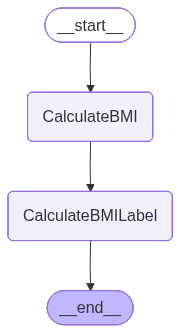

In [31]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())